In [105]:
'''PROBLEM: Design and develop a Machine learning model that can help in making predictions
that may be useful for doctors and healthcare providers to predict potential heart 
disease cases early on.'''

'PROBLEM: Design and develop a Machine learning model that can help in making predictions\nthat may be useful for doctors and healthcare providers to predict potential heart \ndisease cases early on.'

In [117]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [118]:
# Import data
df = pd.read_csv('heart.csv')

In [119]:
# Data exploration

# Top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [120]:
# Bottom 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [121]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [122]:
# Data preprocessing

# Eliminate null values
df = df.dropna()

In [123]:
# Split into independant and dependant variable
X = df.drop('target', axis=1)
y = df['target']

# Normalize features 
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [124]:
# Modeling

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [125]:
# Make predictions
y_pred = model.predict(X_test)

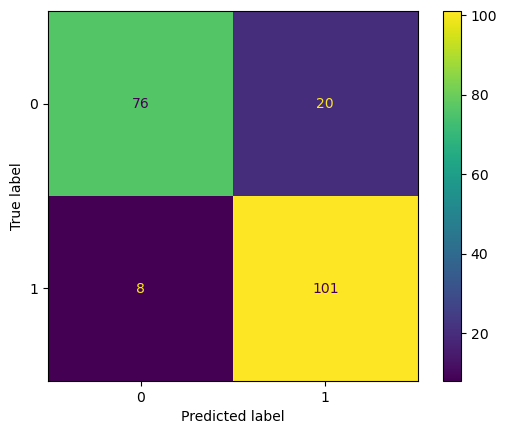

0.8634146341463415

In [126]:
# Evaluate the model

# Confusion matrix: actual vs predicted
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

model.score(X_test, y_test)

In [127]:
# Printing metrics

# How often the model is correct
print("Model Accuracy or Score:", model.score(X_test, y_test))
# Correctly predicted positives
print("Model Precision:", metrics.precision_score(actual, predicted))
# How well the model predicts something is positive
print("Model Sensitivity Recall:", metrics.recall_score(actual, predicted) )
# How well the model is at prediciting negative results
print("Model Specificity:", metrics.recall_score(actual, predicted, pos_label=0))
# Considers false positives and false negatives
print("Model F1-Score:", metrics.f1_score(actual, predicted))

Model Accuracy or Score: 0.8634146341463415
Model Precision: 0.8347107438016529
Model Sensitivity Recall: 0.926605504587156
Model Specificity: 0.7916666666666666
Model F1-Score: 0.8782608695652174
